In [19]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

In [21]:
%matplotlib inline

In [22]:
IMG_DIM = (150,150)

train_files = glob.glob('training_Data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img
             in train_files]

train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() 
                for fn in train_files]

In [23]:
validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM))
                  for img in validation_files]
validation_imgs = np.array(validation_imgs)

validation_labels = [fn.split('/')[1].split('.')[0].strip()
                    for fn in validation_files]

In [24]:
print('Train dataset shape:', train_imgs.shape)
print('Val dataset shape:', validation_imgs.shape)

Train dataset shape: (2930, 150, 150, 3)
Val dataset shape: (993, 150, 150, 3)


In [25]:
train_imgs_scaled = train_imgs.astype('float32')

In [26]:
validation_imgs_scaled = validation_imgs.astype('float32')

In [27]:
train_imgs_scaled.shape

(2930, 150, 150, 3)

In [28]:
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [29]:
print(train_imgs[0].shape)

(150, 150, 3)


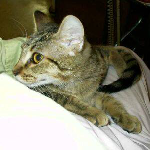

In [36]:
array_to_img(train_imgs[46])

Encoding '0' for cat, '1' for dog

In [31]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

In [32]:
from sklearn.preprocessing import LabelEncoder

In [37]:
train_labels[46]

'cat'

In [35]:
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [38]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'dog', 'cat', 'cat'] [0 1 0 1 0 0 1 1 0 0]


CNN architecture

In [39]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

In [41]:
model = Sequential()

In [42]:
# convolution and pooling layers
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu',
                    input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [44]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(),
             metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [46]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                   validation_data=(validation_imgs_scaled,
                                   validation_labels_enc),
                   batch_size=batch_size,
                    epochs=epochs,
                   verbose=1)

Epoch 1/30
98/98 [==============================] - 49s 482ms/step - loss: 1.1746 - accuracy: 0.5415 - val_loss: 0.6804 - val_accuracy: 0.5992
Epoch 2/30
98/98 [==============================] - 45s 453ms/step - loss: 0.6954 - accuracy: 0.6112 - val_loss: 0.6160 - val_accuracy: 0.6445
Epoch 3/30
98/98 [==============================] - 49s 496ms/step - loss: 0.6081 - accuracy: 0.6780 - val_loss: 0.5941 - val_accuracy: 0.6777
Epoch 4/30
98/98 [==============================] - 42s 424ms/step - loss: 0.5506 - accuracy: 0.7183 - val_loss: 0.5414 - val_accuracy: 0.7261
Epoch 5/30
98/98 [==============================] - 41s 420ms/step - loss: 0.4489 - accuracy: 0.7855 - val_loss: 0.5347 - val_accuracy: 0.7291
Epoch 6/30
98/98 [==============================] - 46s 469ms/step - loss: 0.3582 - accuracy: 0.8438 - val_loss: 0.5513 - val_accuracy: 0.7432
Epoch 7/30
98/98 [==============================] - 47s 482ms/step - loss: 0.2826 - accuracy: 0.8774 - val_loss: 0.6732 - val_accuracy: 0.7210